In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import percentile
from numpy import median
from numpy import abs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

In [2]:
# charger le dataset dans un DataFrame sans nom de colonnes
df = pd.read_csv('dataset_complet.csv',sep=';', encoding='utf-8', header=None)

# renommer les colonnes en leur attribuant des noms
df = df.rename(columns={0: 'DimDistrictFK', 1: 'DimStructurePK', 2: 'DimClientPK',3: 'SA',4: 'designationPRD',5: 'dateop',6: 'QUANTITE_TM'})

# afficher le DataFrame avec les colonnes renommées
print(df.head())

   DimDistrictFK  DimStructurePK  DimClientPK  SA      designationPRD  \
0            406            7267     655852.0  40  ESSENCE SANS PLOMB   
1            416            7341     405766.0  50              GASOIL   
2            416            7208     405212.0  44  ESSENCE SANS PLOMB   
3            406            7268     447387.0  44              GASOIL   
4            411            7308     400251.0  44  ESSENCE SANS PLOMB   

                    dateop QUANTITE_TM  
0  2015-02-02 00:00:00.000       2,241  
1  2017-11-23 00:00:00.000      10,803  
2  2015-02-14 00:00:00.000       5,229  
3  2019-03-09 00:00:00.000      11,634  
4  2017-06-08 00:00:00.000       5,061  


In [3]:
#converting designation

df['designationPRD'] = df['designationPRD'].replace({'GASOIL': 0, 'ESSENCE SANS PLOMB': 1})


In [4]:
df


,DimDistrictFK,DimStructurePK,DimClientPK,SA,designationPRD,dateop,QUANTITE_TM
0,406,7267,655852.0,40,1,2015-02-02 00:00:00.000,"2,241"
1,416,7341,405766.0,50,0,2017-11-23 00:00:00.000,"10,803"
2,416,7208,405212.0,44,1,2015-02-14 00:00:00.000,"5,229"
3,406,7268,447387.0,44,0,2019-03-09 00:00:00.000,"11,634"
4,411,7308,400251.0,44,1,2017-06-08 00:00:00.000,"5,061"
...,...,...,...,...,...,...,...
3345056,410,7304,453549.0,40,1,2017-08-30 00:00:00.000,"2,241"
3345057,410,7304,395651.0,50,0,2018-08-16 00:00:00.000,"13,296"
3345058,416,7232,405768.0,50,0,2020-02-06 00:00:00.000,"24,93"
3345059,416,7232,458637.0,44,1,2019-09-24 00:00:00.000,"2,241"


In [5]:
# Afficher toutes les valeurs uniques de la colonne 'DimStructurePK'
structures_pk = df['DimStructurePK'].unique()
print(structures_pk)

[7267 7341 7208 7268 7308 7298 7316 7358 7241 7218 7287 7283 7385 7351
 7332 7350 7314 7327 7344 7343 7261 7304 7232 7340 7342]


In [6]:
# Remplacer les virgules par des points et convertir en float
df['QUANTITE_TM'] = df['QUANTITE_TM'].apply(lambda x: float(x.replace(',', '.')))

# Afficher les types de données de chaque colonne dans le DataFrame
print(df.dtypes)

DimDistrictFK       int64
DimStructurePK      int64
DimClientPK       float64
SA                  int64
designationPRD      int64
dateop             object
QUANTITE_TM       float64
dtype: object


In [7]:
# Sélectionner les lignes avec DimStructurePK = 7218 et designationPRD = 1
df7218 = df[(df['DimStructurePK'] == 7218) & (df['designationPRD'] == 0)]

# Garder uniquement les colonnes 'dateop' et 'QUANTITE_TM'
df7218 = df7218[['dateop', 'QUANTITE_TM']]

# Afficher le DataFrame df7218
print(df7218)


                          dateop  QUANTITE_TM
42       2019-09-30 00:00:00.000       22.437
49       2018-03-06 00:00:00.000       22.437
53       2019-06-16 00:00:00.000       10.640
60       2016-03-09 00:00:00.000        9.880
61       2015-10-20 00:00:00.000        9.880
...                          ...          ...
3344992  2016-09-09 00:00:00.000       10.640
3345011  2018-09-13 00:00:00.000       10.803
3345012  2019-07-24 00:00:00.000       22.437
3345025  2015-09-08 00:00:00.000        9.880
3345037  2017-06-27 00:00:00.000       22.437

[98406 rows x 2 columns]


In [8]:
df=df7218

In [9]:
# Convertir la colonne 'dateop' en type de données datetime
df['dateop'] = pd.to_datetime(df['dateop'])

# Créer une nouvelle colonne 'mois' contenant le mois extrait de la colonne 'dateop'
df['dateop'] = df['dateop'].dt.to_period('M')

# Calculer la somme des valeurs de 'QUANTITE_TM' par mois
df = df.groupby('dateop')['QUANTITE_TM'].sum().reset_index()

# Afficher le DataFrame avec la somme de 'QUANTITE_TM' par mois
print(df)
df

     dateop   QUANTITE_TM
0   2015-01  35214.677500
1   2015-02  34139.304500
2   2015-03  38073.250900
3   2015-04  37814.557000
4   2015-05  39684.270500
5   2015-06  40998.391500
6   2015-07  36741.801500
7   2015-08  43715.641900
8   2015-09  37258.953000
9   2015-10  40737.153500
10  2015-11  39863.617000
11  2015-12  41276.302200
12  2016-01  36322.205000
13  2016-02  34252.454000
14  2016-03  36511.395150
15  2016-04  37037.466000
16  2016-05  37700.117000
17  2016-06  34445.602950
18  2016-07  34599.075000
19  2016-08  40058.252000
20  2016-09  34974.241700
21  2016-10  36821.453000
22  2016-11  37065.816000
23  2016-12  38033.817900
24  2017-01  33660.864500
25  2017-02  30835.839400
26  2017-03  35794.310520
27  2017-04  34486.238900
28  2017-05  35326.256000
29  2017-06  30148.537000
30  2017-07  37050.593000
31  2017-08  39527.845400
32  2017-09  32883.340911
33  2017-10  34344.041000
34  2017-11  32727.658000
35  2017-12  35135.763000
36  2018-01  32215.698000
37  2018-02 

,dateop,QUANTITE_TM
0,2015-01,35214.677500
1,2015-02,34139.304500
2,2015-03,38073.250900
3,2015-04,37814.557000
4,2015-05,39684.270500
5,2015-06,40998.391500
6,2015-07,36741.801500
7,2015-08,43715.641900
8,2015-09,37258.953000
9,2015-10,40737.153500


In [10]:
#Transformer la variable de temps dateop en index du dataframe :
df = df.set_index('dateop')

In [11]:
df

,QUANTITE_TM
dateop,
2015-01,35214.677500
2015-02,34139.304500
2015-03,38073.250900
2015-04,37814.557000
2015-05,39684.270500
2015-06,40998.391500
2015-07,36741.801500
2015-08,43715.641900
2015-09,37258.953000


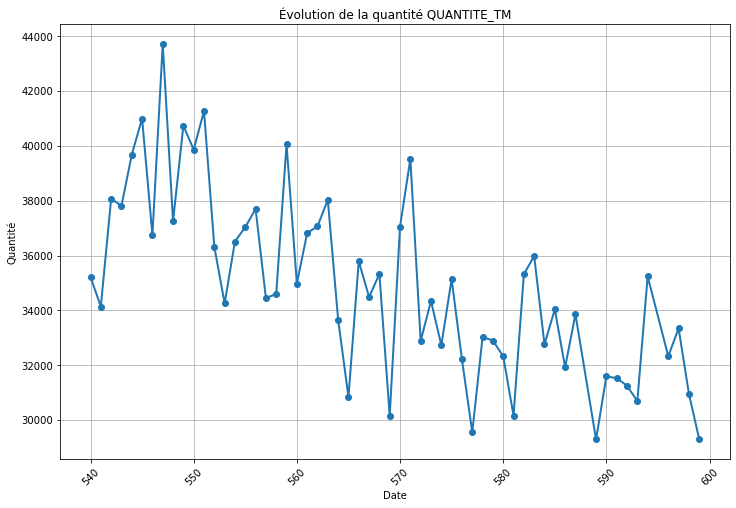

In [12]:
# Convertir l'index en valeurs numériques
df['dateop'] = df.index.astype('int')

# Tracer la courbe d'évolution
plt.figure(figsize=(12, 8))  
plt.plot(df['dateop'], df['QUANTITE_TM'], linewidth=2, marker='o', markersize=6)

# Ajouter des labels et un titre
plt.xlabel('Date')
plt.ylabel('Quantité')
plt.title('Évolution de la quantité QUANTITE_TM')

# Rotation des labels de l'axe x pour une meilleure lisibilité (facultatif)
plt.xticks(rotation=45)

# Afficher la grille (facultatif)
plt.grid(True)

# Afficher la courbe
plt.show()

#si je me trompe pas w lahou A3lem f had la station kayen Trends et non stationnaire. so we need differincing  
#Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

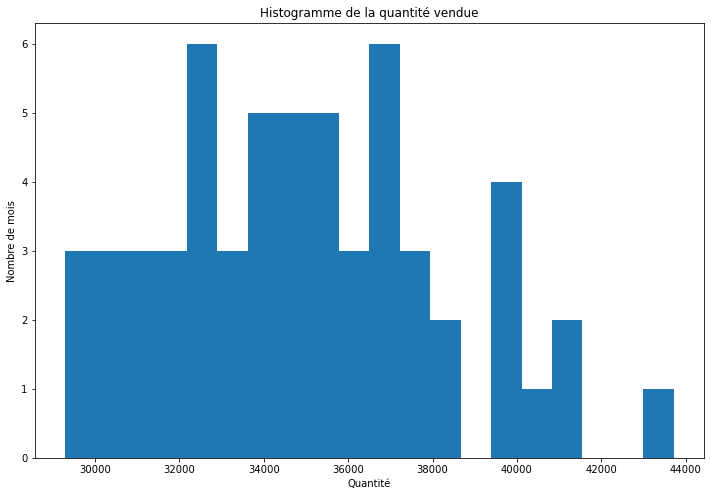

In [13]:
# Histogramme de la variable 'QUANTITE_TM'
plt.figure(figsize=(12, 8))  
plt.hist(df['QUANTITE_TM'], bins=20)
plt.title('Histogramme de la quantité vendue')
plt.xlabel('Quantité')
plt.ylabel('Nombre de mois')
plt.show()

C:\Users\abdel\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


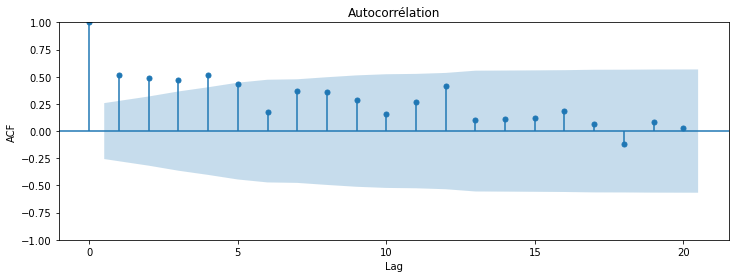

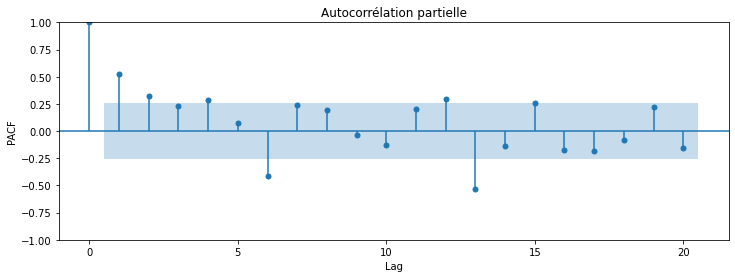

In [14]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Série temporelle
ts = df['QUANTITE_TM']

# Analyse ACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(ts, lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrélation')

# Analyse PACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(ts, lags=20, ax=ax)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Autocorrélation partielle')

plt.show()

#Ce code génère deux graphiques : l'ACF (autocorrélation) et la PACF (autocorrélation partielle) avec des lags allant jusqu'à 20. Vous pouvez ajuster la valeur de lags selon vos besoins. Les graphiques vous aideront à identifier les ordres AR, MA et I en fonction des valeurs significatives de corrélation dans les lags.

In [15]:
from statsmodels.tsa.stattools import acf
from scipy.stats import chi2

# Calculer l'autocorrélation jusqu'à un certain retard
lags = 10
acf_vals = acf(df['QUANTITE_TM'], nlags=lags)

# Calculer les statistiques Q et les p-valeurs
q_stats = len(df['QUANTITE_TM']) * (acf_vals**2)
p_values = 1 - chi2.cdf(q_stats, lags)

# Afficher les résultats numériques
for lag, q_stat, p_value in zip(range(1, lags+1), q_stats, p_values):
    print(f"Lag {lag}: Q-statistic = {q_stat:.4f}, p-value = {p_value:.4f}")


Lag 1: Q-statistic = 58.0000, p-value = 0.0000
Lag 2: Q-statistic = 15.3501, p-value = 0.1198
Lag 3: Q-statistic = 13.8463, p-value = 0.1801
Lag 4: Q-statistic = 12.9506, p-value = 0.2264
Lag 5: Q-statistic = 15.6728, p-value = 0.1094
Lag 6: Q-statistic = 10.8570, p-value = 0.3688
Lag 7: Q-statistic = 1.7485, p-value = 0.9979
Lag 8: Q-statistic = 8.0389, p-value = 0.6250
Lag 9: Q-statistic = 7.4868, p-value = 0.6788
Lag 10: Q-statistic = 4.7722, p-value = 0.9059


In [16]:
print("Ces résultats suggèrent qu'il y a une autocorrélation significative dans les données jusqu'au lag 1, ce qui indique une forte dépendance entre les observations successives avec un retard d'une période. Cela peut être dû à une tendance ou une saisonnalité présente dans les données.Cependant, à partir du lag 2, les valeurs du Q-statistic diminuent et les p-values augmentent, indiquant une diminution de l'autocorrélation et une augmentation de l'indépendance des observations à mesure que le retard augmente. Cela suggère que la dépendance entre les observations décroît rapidement après le premier retard.En conclusion, les résultats indiquent une autocorrélation significative au retard 1, ce qui suggère la présence d'une tendance ou d'une saisonnalité dans les données. Les retards supplémentaires montrent une diminution de l'autocorrélation, ce qui peut être considéré comme une indication que la différenciation pourrait être appropriée pour rendre les données stationnaires.")

Ces résultats suggèrent qu'il y a une autocorrélation significative dans les données jusqu'au lag 1, ce qui indique une forte dépendance entre les observations successives avec un retard d'une période. Cela peut être dû à une tendance ou une saisonnalité présente dans les données.Cependant, à partir du lag 2, les valeurs du Q-statistic diminuent et les p-values augmentent, indiquant une diminution de l'autocorrélation et une augmentation de l'indépendance des observations à mesure que le retard augmente. Cela suggère que la dépendance entre les observations décroît rapidement après le premier retard.En conclusion, les résultats indiquent une autocorrélation significative au retard 1, ce qui suggère la présence d'une tendance ou d'une saisonnalité dans les données. Les retards supplémentaires montrent une diminution de l'autocorrélation, ce qui peut être considéré comme une indication que la différenciation pourrait être appropriée pour rendre les données stationnaires.


In [17]:
print("tester l'autocorrélation sur les données après différenciation. La différenciation est souvent utilisée pour supprimer les tendances et les saisonnalités présentes dans les données, ce qui permet de rendre les données stationnaires. En appliquant le test d'autocorrélation sur les données différenciées, vous pouvez vérifier si les autocorrélations significatives ont été éliminées.Si après différenciation, les autocorrélations significatives sont éliminées ou réduites, cela indiquerait que les tendances et les saisonnalités ont été en grande partie supprimées. Cela suggérerait que vous pouvez poursuivre l'analyse et la modélisation en utilisant les données différenciées.Cependant, si vous constatez que même après différenciation, des autocorrélations significatives persistent, cela peut indiquer que d'autres motifs ou structures temporelles sont présents dans les données. Dans ce cas, vous pouvez envisager d'explorer d'autres techniques de modélisation qui peuvent mieux capturer ces motifs, tels que les modèles ARIMA saisonniers.")

tester l'autocorrélation sur les données après différenciation. La différenciation est souvent utilisée pour supprimer les tendances et les saisonnalités présentes dans les données, ce qui permet de rendre les données stationnaires. En appliquant le test d'autocorrélation sur les données différenciées, vous pouvez vérifier si les autocorrélations significatives ont été éliminées.Si après différenciation, les autocorrélations significatives sont éliminées ou réduites, cela indiquerait que les tendances et les saisonnalités ont été en grande partie supprimées. Cela suggérerait que vous pouvez poursuivre l'analyse et la modélisation en utilisant les données différenciées.Cependant, si vous constatez que même après différenciation, des autocorrélations significatives persistent, cela peut indiquer que d'autres motifs ou structures temporelles sont présents dans les données. Dans ce cas, vous pouvez envisager d'explorer d'autres techniques de modélisation qui peuvent mieux capturer ces moti

In [18]:
# Vérifier si les données sont stationnaires
# Ici, nous utilisons le test augmenté de Dickey-Fuller (ADF) pour tester la stationnarité
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Effectuer le test ADF
    result = adfuller(timeseries)
    
    # Extraire les valeurs de test et comparer avec les valeurs critiques
    test_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    
    # Afficher les résultats
    print('Résultats du test de Dickey-Fuller Augmenté :')
    print(f'   Test Statistic : {test_statistic}')
    print(f'   p-value : {p_value}')
    print(f'   Valeurs Critiques :')
    for key, value in critical_values.items():
        print(f'      {key}: {value}')
    
    # Interprétation des résultats
    if p_value <= 0.05:
        print('Les données sont stationnaires (p-value <= 0.05)')
    else:
        print('Les données ne sont pas stationnaires (p-value > 0.05)')

# Appliquer le test de stationnarité sur la colonne cible 'QUANTITE_TM'
test_stationarity(df['QUANTITE_TM'])

Résultats du test de Dickey-Fuller Augmenté :
   Test Statistic : -2.1192709806366814
   p-value : 0.23683657647779544
   Valeurs Critiques :
      1%: -3.5812576580093696
      5%: -2.9267849124681518
      10%: -2.6015409829867675
Les données ne sont pas stationnaires (p-value > 0.05)


In [19]:
# Diviser les données en deux jeux de données : un ensemble d'entraînement et un ensemble de test
train = list(df.loc['2015-01-01':'2018-12-31']['QUANTITE_TM'])
test = list(df.loc[df.index > '2018-12-31']['QUANTITE_TM'])


In [20]:
test # les valeurs négatives c'est du a la différenciation donc normal.

[29288.706000000002,
 31592.085000000003,
 31523.819,
 31249.331000000002,
 30685.744000000002,
 35234.825000000004,
 32324.606535000003,
 33342.700000000004,
 30956.522,
 29293.154000000002]

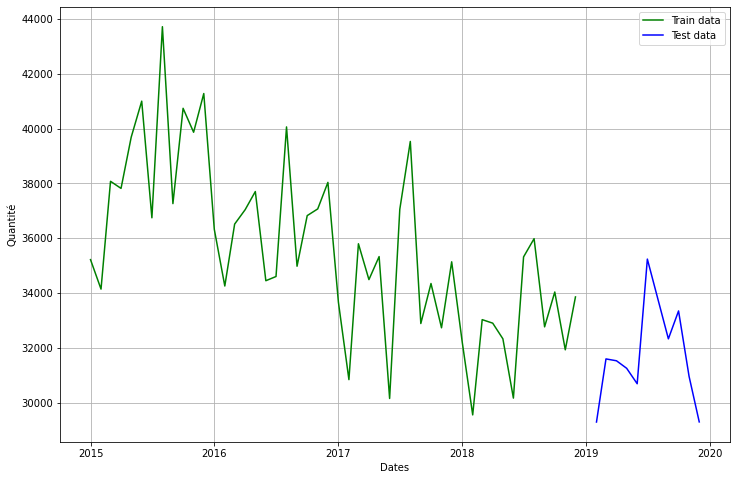

In [21]:
# Convertir l'index en objets Timestamp
df.index = df.index.to_timestamp()

# Tracer la courbe d'évolution
plt.figure(figsize=(12, 8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Quantité')
plt.plot(df.loc['2015-01-01':'2018-12-31']['QUANTITE_TM'], 'green', label="Train data")
plt.plot(df.loc[df.index > '2018-12-31']['QUANTITE_TM'], 'blue', label="Test data")

plt.legend()

# Afficher la courbe
plt.show()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
QNT = df['QUANTITE_TM']
# Utilisation de l'auto-arima pour obtenir les meilleurs paramètres
stepwise_model = auto_arima(QNT, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12, d=1,
                           start_P=0, seasonal=True,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1087.957, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1085.913, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1083.178, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1087.386, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1083.982, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1082.060, Time=0.03 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1083.069, Time=0.11 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1084.784, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1085.322, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1087.661, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1086.994, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=1079.955, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=1081.120, Time=0.07 sec
 ARIMA(1,1,0)(0,0,1)[12]

In [24]:
model_predictions= []
n_test_obser = len(test)

In [25]:
for i in range(n_test_obser):
    model = SARIMAX(train, order=(1, 1, 0), seasonal_order=(0, 0, 0, 12))
    model_fit = model.fit()
    output = model_fit.forecast()
    prediction = output[0]
    model_predictions.append(prediction)

    # Mettre à jour la série de données d'entraînement pour inclure la nouvelle observation
    train.append(test[i])

# Afficher toutes les prédictions
print(model_predictions)

[33499.65814266407, 30150.57593063702, 31146.484696547923, 31537.015380138935, 31302.51529794806, 30795.12983750733, 34347.11931716946, 32910.68689646268, 33136.40908086176, 31443.967511304698]


In [26]:
print("Après avoir obtenu les prédictions différenciées avec le modèle ARIMA, vous devez inverser la différenciation pour obtenir les prédictions dans l'échelle d'origine. Ensuite, vous pouvez comparer ces prédictions avec les valeurs réelles de test de votre jeu de données df pour évaluer la performance du modèle.")

Après avoir obtenu les prédictions différenciées avec le modèle ARIMA, vous devez inverser la différenciation pour obtenir les prédictions dans l'échelle d'origine. Ensuite, vous pouvez comparer ces prédictions avec les valeurs réelles de test de votre jeu de données df pour évaluer la performance du modèle.


In [27]:
from sklearn.metrics import mean_squared_error


# Calculer l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mean_squared_error(test, model_predictions))
print('RMSE:', rmse)



RMSE: 2319.086232015089


In [28]:
print("En exécutant ce code, vous obtenez une série de valeurs predictions_inversed qui représente les prédictions inversées pour chaque observation de test. Ces valeurs correspondent à la prédiction de la variable d'intérêt dans l'échelle d'origine.Plus précisément, pour chaque observation de test, le code prend la prédiction du modèle (qui était basée sur les différences des données d'entraînement) et l'inverse en ajoutant cette prédiction à la dernière valeur de la série d'entraînement. Cela annule l'effet de la différenciation et ramène les prédictions à l'échelle d'origine.En stockant ces prédictions inversées dans la série predictions_inversed, vous pouvez les utiliser pour évaluer la performance du modèle, comparer les prédictions aux valeurs réelles et effectuer d'autres analyses nécessitant des prédictions dans l'échelle d'origine.")

En exécutant ce code, vous obtenez une série de valeurs predictions_inversed qui représente les prédictions inversées pour chaque observation de test. Ces valeurs correspondent à la prédiction de la variable d'intérêt dans l'échelle d'origine.Plus précisément, pour chaque observation de test, le code prend la prédiction du modèle (qui était basée sur les différences des données d'entraînement) et l'inverse en ajoutant cette prédiction à la dernière valeur de la série d'entraînement. Cela annule l'effet de la différenciation et ramène les prédictions à l'échelle d'origine.En stockant ces prédictions inversées dans la série predictions_inversed, vous pouvez les utiliser pour évaluer la performance du modèle, comparer les prédictions aux valeurs réelles et effectuer d'autres analyses nécessitant des prédictions dans l'échelle d'origine.


In [29]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   57
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -528.824
Date:                Thu, 08 Jun 2023   AIC                           1061.648
Time:                        13:06:20   BIC                           1065.698
Sample:                             0   HQIC                          1063.218
                                 - 57                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2043      0.043     -4.737      0.000      -0.289      -0.120
sigma2      7.982e+06   5.82e-11   1.37e+17      0.000    7.98e+06    7.98e+06
Ljung-Box (L1) (Q):                   5.31   Jarque-

<function matplotlib.pyplot.show(close=None, block=None)>

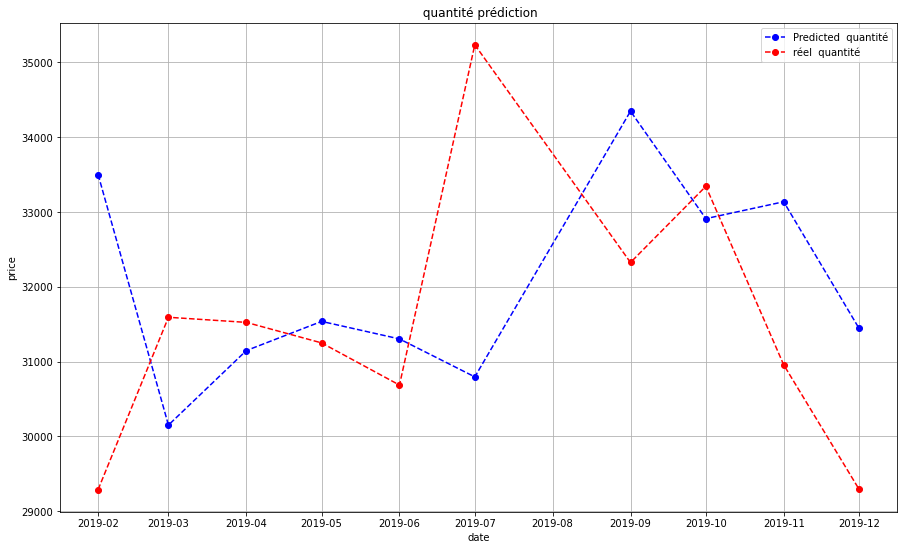

In [30]:
plt.figure(figsize = (15,9))
plt.grid(True)

date_range = df.loc[df.index > '2018-12-31']['QUANTITE_TM'].index

plt.plot(date_range, model_predictions, color="blue", marker = "o", linestyle="dashed", label="Predicted  quantité")
plt.plot(date_range, test, color="red", marker = "o", linestyle="dashed", label="réel  quantité")

plt.title(" quantité prédiction")
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show



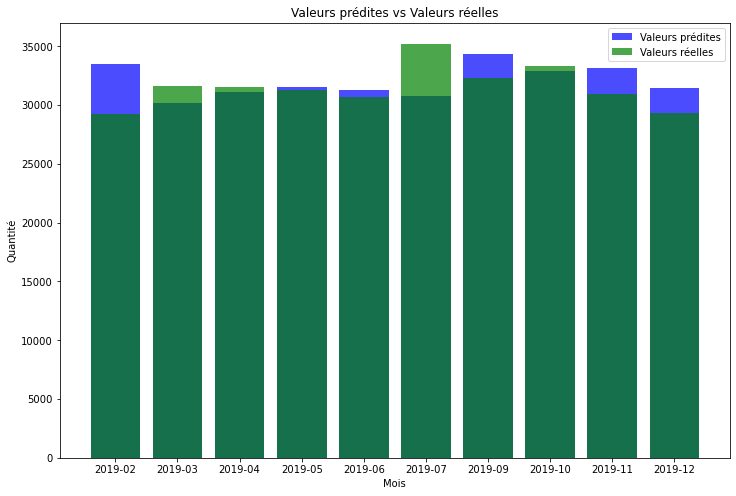

RMSE: 2319.086232015089
R-squared: -0.8680309793567107


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Convertir les dates de l'index en objets de type 'Period' et les convertir en chaînes de caractères
months = df.loc[df.index > '2018-12-31'].index.to_period('M').astype(str)

# Calculer les métriques d'évaluation
rmse = np.sqrt(mean_squared_error(test, model_predictions))
r2 = r2_score(test, model_predictions)

# Tracer les barres pour chaque mois
plt.figure(figsize=(12, 8))
plt.bar(months, model_predictions, color='blue', alpha=0.7, label='Valeurs prédites')
plt.bar(months, test, color='green', alpha=0.7, label='Valeurs réelles')

# Ajouter des labels et un titre
plt.xlabel('Mois')
plt.ylabel('Quantité')
plt.title('Valeurs prédites vs Valeurs réelles')
plt.legend()

# Afficher le graphique
plt.show()

# Afficher les métriques d'évaluation
print("RMSE:", rmse)
print("R-squared:", r2)





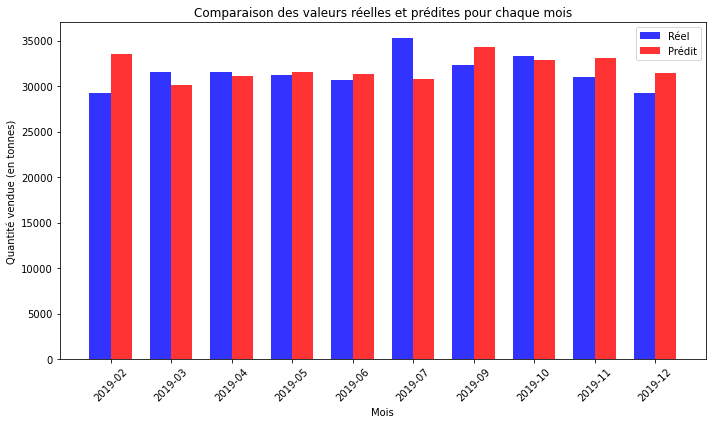

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Définir les données
y_true = test
y_pred = model_predictions
months = df.loc[df.index > '2018-12-31'].index.to_period('M').astype(str)
months = months

# Créer la figure
fig, ax = plt.subplots(figsize=(10, 6))

# Créer les barres pour les valeurs réelles et prédites
bar_width = 0.35
opacity = 0.8
index = np.arange(len(months))
rects1 = ax.bar(index, y_true, bar_width, alpha=opacity, color='b', label='Réel')
rects2 = ax.bar(index + bar_width, y_pred, bar_width, alpha=opacity, color='r', label='Prédit')

# Ajouter des étiquettes, un titre et une légende
ax.set_xlabel('Mois')
ax.set_ylabel('Quantité vendue (en tonnes)')
ax.set_title('Comparaison des valeurs réelles et prédites pour chaque mois')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(months, rotation=45)
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()
